# Aufgabe 1: Lineare kleinste Quadrate

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x = np.array([-2, -1, 1, 2])
y = np.array([26, 0, 8, -10])

## Aufgabe 1.1

### Feature-Matrix

In [16]:
X = np.stack([np.ones(len(x)), x ** 3, np.sin(np.pi / 2 * x)]).T
print(X)

[[ 1.0000000e+00 -8.0000000e+00 -1.2246468e-16]
 [ 1.0000000e+00 -1.0000000e+00 -1.0000000e+00]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  8.0000000e+00  1.2246468e-16]]


### Normalengleichung

In [17]:
# alternativ: X.T@X
XTX = np.matmul(X.T, X)
print(XTX)

# alternativ: X.T@y
XTy = np.matmul(X.T, y)
print(XTy)

[[ 4.0000000e+00  0.0000000e+00 -9.9579925e-17]
 [ 0.0000000e+00  1.3000000e+02  2.0000000e+00]
 [-9.9579925e-17  2.0000000e+00  2.0000000e+00]]
[  24. -280.    8.]


In [18]:
W = np.linalg.lstsq(np.matmul(X.T, X), np.matmul(X.T, y), rcond=None)[0]
print(W)

# test
print(np.linalg.lstsq(X, y, rcond=None)[0])

[ 6.   -2.25  6.25]
[ 6.   -2.25  6.25]


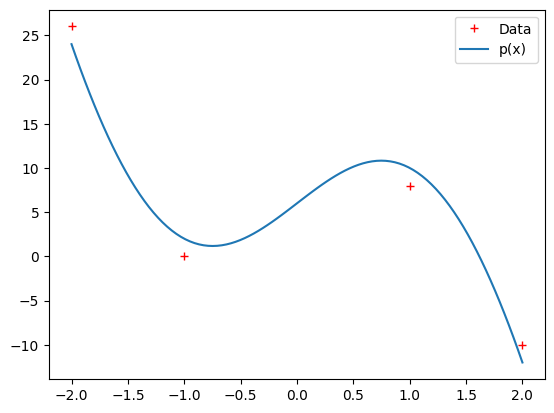

In [19]:
def p(x):
    return W[0] + W[1] * x ** 3 + W[2] * np.sin(np.pi / 2 * x)

x_plot = np.linspace(x[0], x[-1], 100)

plt.plot(x, y, 'r+', label='Data')
plt.plot(x_plot, p(x_plot), label='p(x)')
plt.legend()
plt.show()

### kleinste Quadrate-Fehler

In [20]:
r = y - np.matmul(X, W)
print(r)

err = np.linalg.norm(r, 2) ** 2
print(err)

[ 2. -2. -2.  2.]
16.0


## Aufgabe 1.2

In [21]:
p(3)

-60.99999999999999